In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import cross_val_score
import statistics as st

In [2]:
# Travail sur la reconnaissance de chiffres manuscrits

# Chargement des données
mnist = fetch_openml('mnist_784')
print(mnist)

X, y = mnist['data'], mnist['target']
X = np.array(X)
y = np.array(y)
print(X)
print(y)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

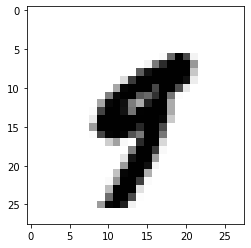

In [3]:
# Affichage d'une des images

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')

In [4]:
# Répartition des échantillons de test et d'apprentissage

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [5]:
# Premier apprentissage : classifieur binaire à deux classe pour les 5

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

mlp = MLPClassifier(hidden_layer_sizes=(20,20))
mlp.fit(X_train, y_train_5)

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test_5, predictions))
print(classification_report(y_test_5, predictions))

[[9075   33]
 [  38  854]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9108
        True       0.96      0.96      0.96       892

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [6]:
# 1. Amélioration potentielle de la performance en changeant le nombre de couches

# _______ 1 couche _______

L_precision_1 = []; L_recall_1 = []; L_cross_vall_1 = []
for i in range (1,31):
    n=0; L_moy_precision = []; L_moy_recall = []; L_moy_cross_val = []
    while n<3:
        mlp = MLPClassifier(activation='relu',
                            alpha=0.0001,
                            batch_size='auto',
                            beta_1=0.9,
                            beta_2=0.999,
                            early_stopping=False,
                            epsilon=(10 ** (-8)),
                            hidden_layer_sizes=(i),
                            learning_rate='constant',
                            learning_rate_init=0.001,
                            max_iter=200,
                            momentum=0.9,
                            nesterovs_momentum=True,
                            power_t=0.5,
                            random_state=None,
                            shuffle=True,
                            solver='adam',
                            tol=0.0001,
                            validation_fraction=0.1,
                            verbose=False,
                            warm_start=False)
        mlp.fit(X_train, y_train_5)
        predictions = mlp.predict(X_test)
        report = classification_report(y_test_5, predictions, output_dict=True)
        L_moy_precision.append(report['weighted avg']['precision'])
        L_moy_recall.append(report['weighted avg']['recall'])
        L_moy_cross_val.append(st.mean(cross_val_score(mlp, X_train, y_train_5, cv=3, scoring='accuracy')))
        n=n+1
    moy_precision = st.mean(L_moy_precision)
    moy_recall = st.mean(L_moy_recall)
    moy_cross_val = st.mean(L_moy_cross_val)
    L_precision_1.append(moy_precision)
    L_recall_1.append(moy_recall)
    L_cross_vall_1.append(moy_cross_val)

C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\neural_network\_

In [7]:
# _______ 2 couches _______
L_precision_2 = []; L_recall_2 = []; L_cross_vall_2 = []
for i in range (1,31):
    n=0; L_moy_precision = []; L_moy_recall = []; L_moy_cross_val = []
    while n<3:
        mlp = MLPClassifier(activation='relu',
                            alpha=0.0001,
                            batch_size='auto',
                            beta_1=0.9,
                            beta_2=0.999,
                            early_stopping=False,
                            epsilon=(10 ** (-8)),
                            hidden_layer_sizes=(i, i),
                            learning_rate='constant',
                            learning_rate_init=0.001,
                            max_iter=200,
                            momentum=0.9,
                            nesterovs_momentum=True,
                            power_t=0.5,
                            random_state=None,
                            shuffle=True,
                            solver='adam',
                            tol=0.0001,
                            validation_fraction=0.1,
                            verbose=False,
                            warm_start=False)
        mlp.fit(X_train, y_train_5)
        predictions = mlp.predict(X_test)
        report = classification_report(y_test_5, predictions, output_dict=True)
        L_moy_precision.append(report['weighted avg']['precision'])
        L_moy_recall.append(report['weighted avg']['recall'])
        L_moy_cross_val.append(st.mean(cross_val_score(mlp, X_train, y_train_5, cv=3, scoring='accuracy')))
        n = n + 1
    moy_precision = st.mean(L_moy_precision)
    moy_recall = st.mean(L_moy_recall)
    moy_cross_val = st.mean(L_moy_cross_val)
    L_precision_2.append(moy_precision)
    L_recall_2.append(moy_recall)
    L_cross_vall_2.append(moy_cross_val)

C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\

In [8]:
# _______ 3 couches _______
L_precision_3 = []; L_recall_3 = []; L_cross_vall_3 = []
for i in range (1,31):
    n=0; L_moy_precision = []; L_moy_recall = []; L_moy_cross_val = []
    while n<3:
        mlp = MLPClassifier(activation='relu',
                            alpha=0.0001,
                            batch_size='auto',
                            beta_1=0.9,
                            beta_2=0.999,
                            early_stopping=False,
                            epsilon=(10 ** (-8)),
                            hidden_layer_sizes=(i, i, i),
                            learning_rate='constant',
                            learning_rate_init=0.001,
                            max_iter=200,
                            momentum=0.9,
                            nesterovs_momentum=True,
                            power_t=0.5,
                            random_state=None,
                            shuffle=True,
                            solver='adam',
                            tol=0.0001,
                            validation_fraction=0.1,
                            verbose=False,
                            warm_start=False)
        mlp.fit(X_train, y_train_5)
        predictions = mlp.predict(X_test)
        report = classification_report(y_test_5, predictions, output_dict=True)
        L_moy_precision.append(report['weighted avg']['precision'])
        L_moy_recall.append(report['weighted avg']['recall'])
        L_moy_cross_val.append(st.mean(cross_val_score(mlp, X_train, y_train_5, cv=3, scoring='accuracy')))
        n = n + 1
    moy_precision = st.mean(L_moy_precision)
    moy_recall = st.mean(L_moy_recall)
    moy_cross_val = st.mean(L_moy_cross_val)
    L_precision_3.append(moy_precision)
    L_recall_3.append(moy_recall)
    L_cross_vall_3.append(moy_cross_val)

C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\

In [9]:
# _______ 4 couches _______
L_precision_4 = []; L_recall_4 = []; L_cross_vall_4 = []
for i in range (1,31):
    n=0; L_moy_precision = []; L_moy_recall = []; L_moy_cross_val = []
    while n<3:
        mlp = MLPClassifier(activation='relu',
                            alpha=0.0001,
                            batch_size='auto',
                            beta_1=0.9,
                            beta_2=0.999,
                            early_stopping=False,
                            epsilon=(10 ** (-8)),
                            hidden_layer_sizes=(i, i, i, i),
                            learning_rate='constant',
                            learning_rate_init=0.001,
                            max_iter=200,
                            momentum=0.9,
                            nesterovs_momentum=True,
                            power_t=0.5,
                            random_state=None,
                            shuffle=True,
                            solver='adam',
                            tol=0.0001,
                            validation_fraction=0.1,
                            verbose=False,
                            warm_start=False)
        mlp.fit(X_train, y_train_5)
        predictions = mlp.predict(X_test)
        report = classification_report(y_test_5, predictions, output_dict=True)
        L_moy_precision.append(report['weighted avg']['precision'])
        L_moy_recall.append(report['weighted avg']['recall'])
        L_moy_cross_val.append(st.mean(cross_val_score(mlp, X_train, y_train_5, cv=3, scoring='accuracy')))
        n = n + 1
    moy_precision = st.mean(L_moy_precision)
    moy_recall = st.mean(L_moy_recall)
    moy_cross_val = st.mean(L_moy_cross_val)
    L_precision_4.append(moy_precision)
    L_recall_4.append(moy_recall)
    L_cross_vall_4.append(moy_cross_val)

C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\

In [10]:
# _______ 5 couches _______
L_precision_5 = []; L_recall_5 = []; L_cross_vall_5 = []
for i in range (1,31):
    n=0; L_moy_precision = []; L_moy_recall = []; L_moy_cross_val = []
    while n<3:
        mlp = MLPClassifier(activation='relu',
                            alpha=0.0001,
                            batch_size='auto',
                            beta_1=0.9,
                            beta_2=0.999,
                            early_stopping=False,
                            epsilon=(10 ** (-8)),
                            hidden_layer_sizes=(i, i, i, i, i),
                            learning_rate='constant',
                            learning_rate_init=0.001,
                            max_iter=200,
                            momentum=0.9,
                            nesterovs_momentum=True,
                            power_t=0.5,
                            random_state=None,
                            shuffle=True,
                            solver='adam',
                            tol=0.0001,
                            validation_fraction=0.1,
                            verbose=False,
                            warm_start=False)
        mlp.fit(X_train, y_train_5)
        predictions = mlp.predict(X_test)
        report = classification_report(y_test_5, predictions, output_dict=True)
        L_moy_precision.append(report['weighted avg']['precision'])
        L_moy_recall.append(report['weighted avg']['recall'])
        L_moy_cross_val.append(st.mean(cross_val_score(mlp, X_train, y_train_5, cv=3, scoring='accuracy')))
        n = n + 1
    moy_precision = st.mean(L_moy_precision)
    moy_recall = st.mean(L_moy_recall)
    moy_cross_val = st.mean(L_moy_cross_val)
    L_precision_5.append(moy_precision)
    L_recall_5.append(moy_recall)
    L_cross_vall_5.append(moy_cross_val)

C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dalyan\anaconda3\lib\site-packages\sklearn\

In [11]:
nb_neurones = range(1,31)

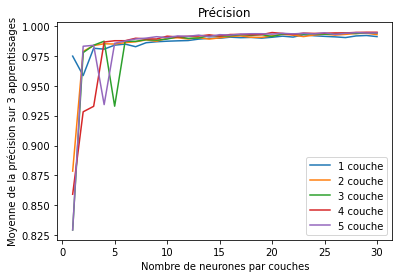

In [12]:
#Tracé de la précision du MLP en fonction du nb de couches cachées

plt.plot(nb_neurones, L_precision_1, label = '1 couche')
plt.plot(nb_neurones, L_precision_2, label = '2 couche')
plt.plot(nb_neurones, L_precision_3, label = '3 couche')
plt.plot(nb_neurones, L_precision_4, label = '4 couche')
plt.plot(nb_neurones, L_precision_5, label = '5 couche')
plt.title('Précision')
plt.xlabel('Nombre de neurones par couches')
plt.ylabel('Moyenne de la précision sur 3 apprentissages')
#plt.ylim(0.95, 1)
plt.legend()
plt.show()

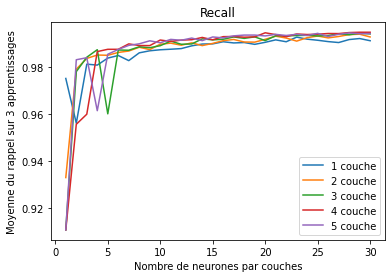

In [13]:
#Tracé du recall du MLP en fonction du nb de couches cachées

plt.plot(nb_neurones, L_recall_1, label = '1 couche')
plt.plot(nb_neurones, L_recall_2, label = '2 couche')
plt.plot(nb_neurones, L_recall_3, label = '3 couche')
plt.plot(nb_neurones, L_recall_4, label = '4 couche')
plt.plot(nb_neurones, L_recall_5, label = '5 couche')
plt.xlabel('Nombre de neurones par couches')
plt.ylabel('Moyenne du rappel sur 3 apprentissages')
#plt.ylim(0.95, 1)
plt.title('Recall')
plt.legend()
plt.show()

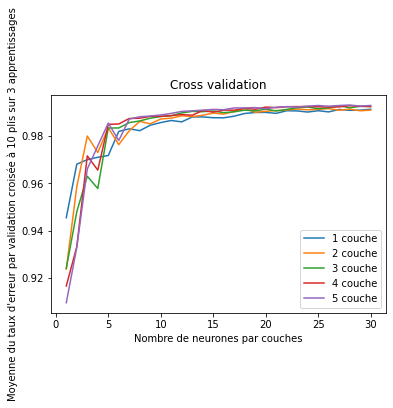

In [14]:
#Tracé de l'erreur par validation croisé à 10 plis en fonction du nb de couches cachées

plt.plot(nb_neurones, L_cross_vall_1, label = '1 couche')
plt.plot(nb_neurones, L_cross_vall_2, label = '2 couche')
plt.plot(nb_neurones, L_cross_vall_3, label = '3 couche')
plt.plot(nb_neurones, L_cross_vall_4, label = '4 couche')
plt.plot(nb_neurones, L_cross_vall_5, label = '5 couche')
plt.xlabel('Nombre de neurones par couches')
plt.ylabel("Moyenne du taux d'erreur par validation croisée à 10 plis sur 3 apprentissages")
#plt.ylim(0.95, 1)
plt.title('Cross validation')
plt.legend()
plt.show()